<a href="https://colab.research.google.com/github/harsh194/machine_learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/greyhatguy007/Machine-Learning-Specialization-Coursera/blob/main/C1%20-%20Supervised%20Machine%20Learning%20-%20Regression%20and%20Classification/week3/C1W3A1/C1_W3_Logistic_Regression.ipynb

In [3]:
import os
new_directory = '/content/drive/MyDrive/Harsh/Supervised Machine Learning/Week 3'
os.chdir(new_directory)
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

In [4]:
X_train, y_train = load_data("data/ex2data1.txt")

In [5]:
X_train[:5]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [6]:
y_train[:5]

array([0., 0., 0., 1., 1.])

In [7]:
X_train.shape

(100, 2)

In [8]:
y_train.shape

(100,)

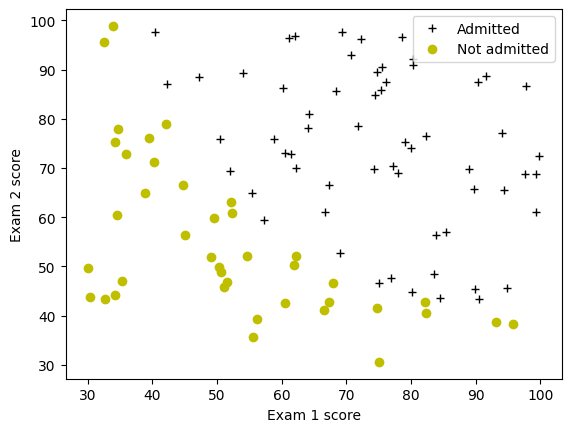

In [13]:
plot_data(X_train,y_train[:], pos_label = "Admitted", neg_label = "Not admitted")
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.legend(loc = "upper right")
plt.show()

In [14]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [15]:
sigmoid(np.array([-1,0,1,2]))

array([0.26894142, 0.5       , 0.73105858, 0.88079708])

In [23]:
def compute_cost(X,y,w,b, lambda_ = 1):
    m, n = X.shape
    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) +b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb)-(1-y[i])*np.log(1-f_wb)
    total_cost = cost/m

    return total_cost


In [25]:
m,n = X_train.shape
initial_w = np.zeros(n)
initial_b = 0
cost = compute_cost(X_train, y_train, initial_w, initial_b)
cost

0.6931471805599458

In [27]:
def compute_gradient(X,y,w,b, lambda_= None):
    m,n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]
        dj_db = dj_db + err_i

    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_db, dj_dw


In [28]:
dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)

In [29]:
dj_db

-0.1

In [30]:
dj_dw

array([-12.00921659, -11.26284221])

In [34]:
def gradient_descent(X,y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    m = len(X)
    J_history =[]
    w_history =[]

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        if i < 1000000:
            cost = cost_function(X,y,w_in,b_in, lambda_)
            J_history.append(cost)
            w_history.append(w_in)
        print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history

In [ ]:
from numpy.lib.function_base import gradient
np.random.seed(1)
initial_w = 0.01*(np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -10

iteration = 10000
alpha = 0.001

w,b,J_history, w_history = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iteration, 0)

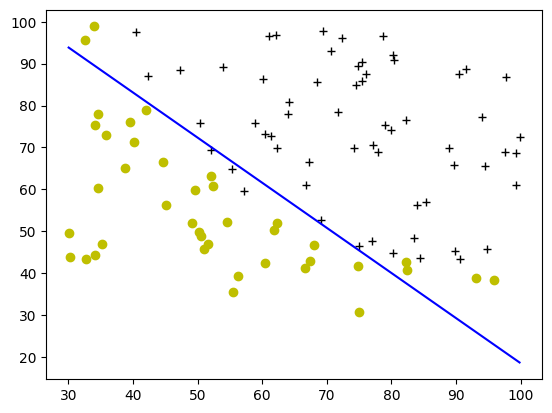

In [40]:
plot_decision_boundary(w,b, X_train, y_train)

In [41]:
def predict(X,w,b):
    m,n = X.shape
    p = np.zeros(m)

    for i in range(m):
        z_wb = np.dot(X[i],w)

        z_wb +=b
        f_wb = sigmoid(z_wb)

        p[i] = 1 if f_wb >0.5 else 0

    return p

In [42]:
p = predict(X_train,w,b)

In [44]:
np.mean(p==y_train)*100

91.0

Regularized Logistic Regression

In [45]:
X_train, y_train = load_data("data/ex2data2.txt")

In [46]:
# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


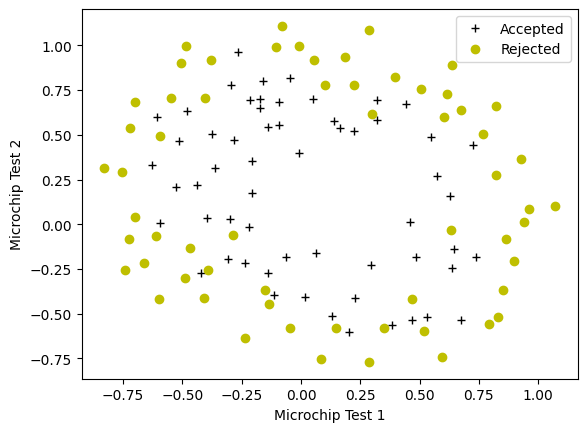

In [48]:
plot_data(X_train, y_train[:], pos_label = "Accepted", neg_label = "Rejected")
plt.ylabel('Microchip Test 2')
plt.xlabel('Microchip Test 1')
plt.legend(loc = "upper right")
plt.show()